In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [3]:
from src.plots import Plot

In [4]:
df = pd.read_csv('data/tel_dump.csv')

In [5]:
plot = Plot()

In [6]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
df = df.query("`Handset Manufacturer` != 'undefined' and `Handset Type` != 'undefined'")[df.columns]

In [10]:
# Data Cleaning: Handling missing values for relevant columns

# Fill missing numerical values with the mean of the respective column
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())



# Fill missing categorical values with the mode
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])
df['MSISDN/Number'] = df['MSISDN/Number'].fillna(df['MSISDN/Number'].mode()[0])

# Confirm that missing values have been addressed in these columns
cleaned_data_info = df[['Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)' ,'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Handset Type', 'MSISDN/Number']].isnull().sum()

cleaned_data_info  # Output to confirm the missing values have been handled


Avg Bearer TP UL (kbps)        0
Avg Bearer TP DL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Handset Type                   0
MSISDN/Number                  0
dtype: int64

In [11]:
# Task 4.1: Aggregate information per customer
# Group by customer (using 'MSISDN/Number') and calculate the required metrics

# Combine the calculated metrics into a single dataframe also add their respective handset type
customer_experience_aggregate = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': "sum",
    'TCP UL Retrans. Vol (Bytes)': "sum",
    'Avg RTT DL (ms)': "sum",
    'Avg RTT UL (ms)': "sum",
    'Handset Type': "first",
    'Avg Bearer TP UL (kbps)': "sum",
    'Avg Bearer TP DL (kbps)': "sum"
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': "average_download_retransmission",
    'TCP UL Retrans. Vol (Bytes)': "average_upload_retransmission",
    'Avg RTT UL (ms)': "average_upload_rtt",
    'Avg RTT DL (ms)': "average_download_rtt",
    'Avg Bearer TP UL (kbps)': "average_upload_throughput",
    'Avg Bearer TP DL (kbps)': "average_download_throughput",
    'Handset Type': "handset_type",
})

# Calculate the total download and upload traffic
# customer_experience_aggregate["total_traffic"] = customer_experience_aggregate["total_download_traffic"] + customer_experience_aggregate["total_upload_traffic"]

customer_experience_aggregate.info()  # Display the first few rows of the aggregated information per customer


<class 'pandas.core.frame.DataFrame'>
Index: 100187 entries, 33601001722.0 to 882397108489451.0
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   average_download_retransmission  100187 non-null  float64
 1   average_upload_retransmission    100187 non-null  float64
 2   average_download_rtt             100187 non-null  float64
 3   average_upload_rtt               100187 non-null  float64
 4   handset_type                     100187 non-null  object 
 5   average_upload_throughput        100187 non-null  float64
 6   average_download_throughput      100187 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB


In [29]:
customer_experience_aggregate

,average_download_retransmission,average_upload_retransmission,average_download_rtt,average_upload_rtt,handset_type,average_upload_throughput,average_download_throughput,total_tcp_retransmission,total_rtt,total_throughput
MSISDN/Number,,,,,,,,,,
3.360100e+10,2.157482e+07,7.839789e+05,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,39.0,37.0,2.235880e+07,46.000000,76.0
3.360100e+10,2.157482e+07,7.839789e+05,30.000000,1.000000,Apple iPhone 7 (A1778),51.0,48.0,2.235880e+07,31.000000,99.0
3.360101e+10,1.066000e+03,7.839789e+05,69.000000,15.000000,Apple iPhone 5S (A1457),44.0,204.0,7.850449e+05,84.000000,248.0
3.360101e+10,3.092445e+07,8.051809e+05,114.000000,5.000000,Apple iPhone Se (A1723),16449.0,40395.0,3.172963e+07,119.000000,56844.0
3.360101e+10,2.157758e+07,1.567958e+06,131.434334,20.602593,Samsung Galaxy A8 (2018),386.0,7522.0,2.314554e+07,152.036927,7908.0
...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,2.150440e+05,3.001000e+03,42.000000,10.000000,Huawei Honor 9 Lite,387.0,9978.0,2.180450e+05,52.000000,10365.0
3.379000e+10,2.157482e+07,7.839789e+05,34.000000,6.000000,Apple iPhone 8 Plus (A1897),48.0,68.0,2.235880e+07,40.000000,116.0
3.197021e+12,2.157482e+07,7.839789e+05,110.434334,17.602593,Quectel Wireless. Quectel Ec25-E,0.0,1.0,2.235880e+07,128.036927,1.0


In [13]:
handset_aggregate = df.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (Bytes)': "sum",
    'TCP UL Retrans. Vol (Bytes)': "sum",
    'Avg RTT DL (ms)': "sum",
    'Avg RTT UL (ms)': "sum",
    'Avg Bearer TP UL (kbps)': "sum",
    'Avg Bearer TP DL (kbps)': "sum"
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': "average_download_retransmission",
    'TCP UL Retrans. Vol (Bytes)': "average_upload_retransmission",
    'Avg RTT UL (ms)': "average_upload_rtt",
    'Avg RTT DL (ms)': "average_download_rtt",
    'Avg Bearer TP UL (kbps)': "average_upload_throughput",
    'Avg Bearer TP DL (kbps)': "average_download_throughput",
})

handset_aggregate

,average_download_retransmission,average_upload_retransmission,average_download_rtt,average_upload_rtt,average_upload_throughput,average_download_throughput
Handset Type,,,,,,
A-Link Telecom I. Cubot A5,2.157482e+07,7.839789e+05,40.000000,2.000000,326.0,23184.0
A-Link Telecom I. Cubot Note Plus,6.023490e+05,1.386400e+04,1581.000000,8.000000,172.0,6527.0
A-Link Telecom I. Cubot Note S,4.134448e+07,6.725200e+04,886.000000,4.000000,422.0,8515.0
A-Link Telecom I. Cubot Nova,1.358400e+05,1.330000e+03,40.000000,4.000000,550.0,55667.0
A-Link Telecom I. Cubot Power,7.799000e+03,2.420000e+02,39.000000,4.000000,342.0,69126.0
...,...,...,...,...,...,...
Zte Starxtrem By Sfr,2.157482e+07,5.160500e+04,110.434334,17.602593,888.0,0.0
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,2.157748e+07,1.567958e+06,313.434334,18.602593,27.0,89.0
Zyxel Communicat. Lte7460,2.384303e+07,1.743352e+07,87.000000,46.000000,22215.0,39741.0


c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


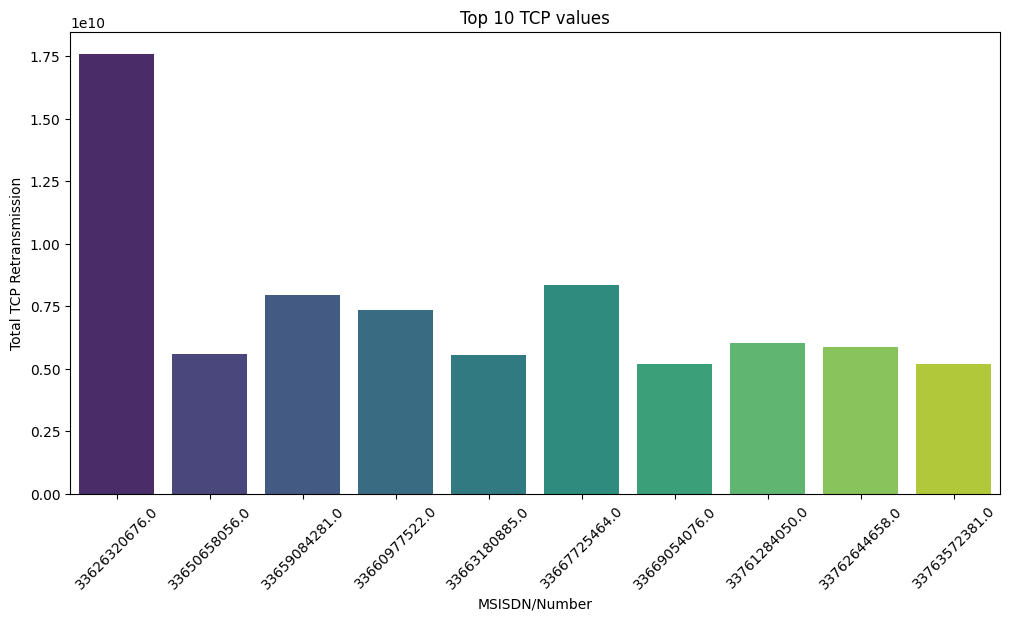

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


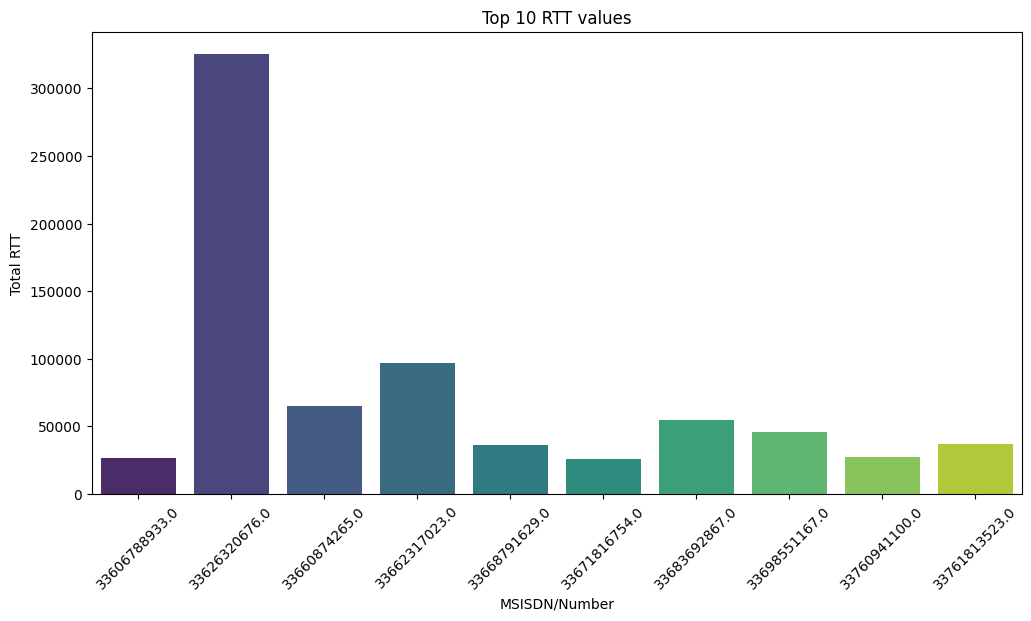

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


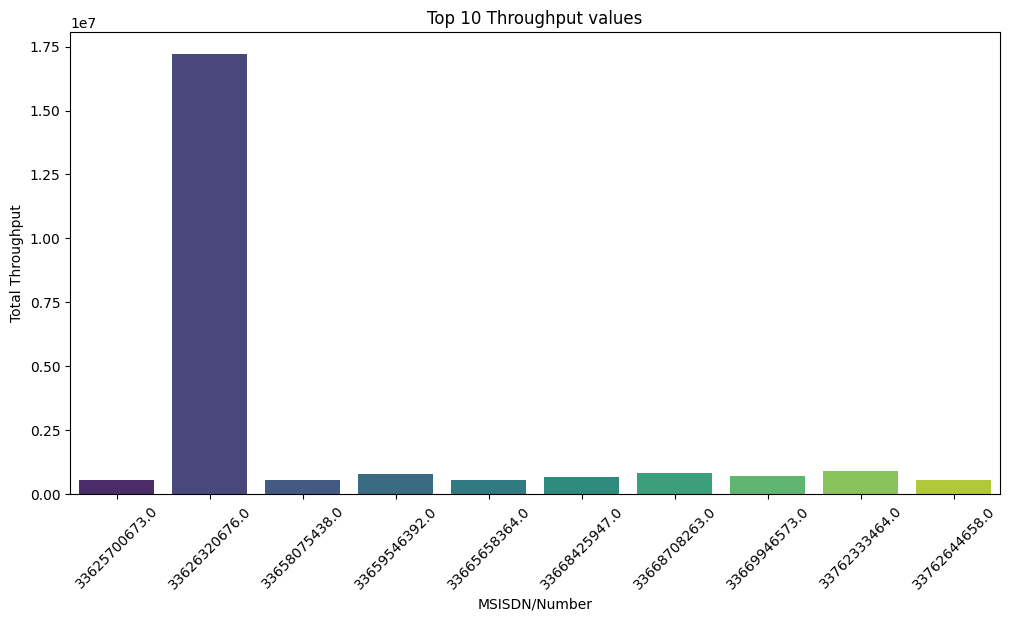

In [28]:
# Task 4.2: Compute and list 10 of the top, bottom, and most frequent values for TCP retransmission, RTT, and throughput

# Define a function to get top, bottom, and most frequent values
def get_top_bottom_frequent(series: pd.DataFrame, n=10) -> pd.DataFrame:
    top_values = series.nlargest(n)  # Top values
    bottom_values = series.nsmallest(n)  # Bottom values
    most_frequent_values = series.value_counts().nlargest(n)  # Most frequent values
    return top_values, bottom_values, most_frequent_values

# Top, bottom, and most frequent TCP retransmission values
tcp_dl = customer_experience_aggregate['average_download_retransmission']
tcp_ul = customer_experience_aggregate['average_upload_retransmission']
tcp_total = tcp_dl + tcp_ul  # Total TCP retransmission
customer_experience_aggregate['total_tcp_retransmission'] = tcp_total

top_tcp, bottom_tcp, most_frequent_tcp = get_top_bottom_frequent(tcp_total)

# Top, bottom, and most 7890-=frequent RTT values
rtt_dl = customer_experience_aggregate['average_download_rtt']
rtt_ul = customer_experience_aggregate['average_upload_rtt']
rtt_total = rtt_dl + rtt_ul  # Average RTT
customer_experience_aggregate['total_rtt'] = rtt_total

top_rtt, bottom_rtt, most_frequent_rtt = get_top_bottom_frequent(rtt_total)

# Top, bottom, and most frequent throughput values
throughput_dl = customer_experience_aggregate['average_download_throughput']
throughput_ul = customer_experience_aggregate['average_upload_throughput']
throughput_total = throughput_dl + throughput_ul # Average throughput
customer_experience_aggregate['total_throughput'] = throughput_total

top_throughput, bottom_throughput, most_frequent_throughput = get_top_bottom_frequent(throughput_total)

# Create a dictionary with the results for easy output
tcp_results = {
    "Top 10 TCP values": top_tcp,
    "Bottom 10 TCP values": bottom_tcp,
    "Most frequent 10 TCP values": most_frequent_tcp
}

rtt_results = {
    "Top 10 RTT values": top_rtt,
    "Bottom 10 RTT values": bottom_rtt,
    "Most frequent 10 RTT values": most_frequent_rtt
}

throughput_results = {
    "Top 10 Throughput values": top_throughput,
    "Bottom 10 Throughput values": bottom_throughput,
    "Most frequent 10 Throughput values": most_frequent_throughput
}

# tcp_results, rtt_results, throughput_results  # Display the results for each category
plot.plot_bar(top_tcp.index, top_tcp, "MSISDN/Number", "Total TCP Retransmission", "Top 10 TCP values")
plot.plot_bar(top_rtt.index, top_rtt, "MSISDN/Number", "Total RTT", "Top 10 RTT values")
plot.plot_bar(top_throughput.index, top_throughput, "MSISDN/Number", "Total Throughput", "Top 10 Throughput values")
# plot all results in one plot

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


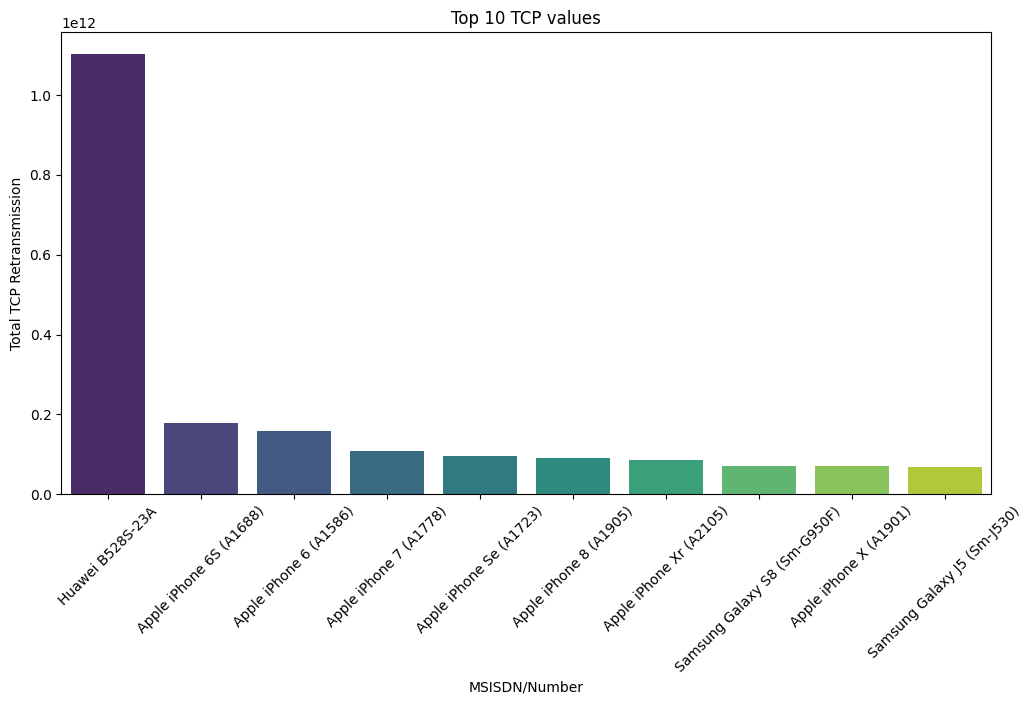

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


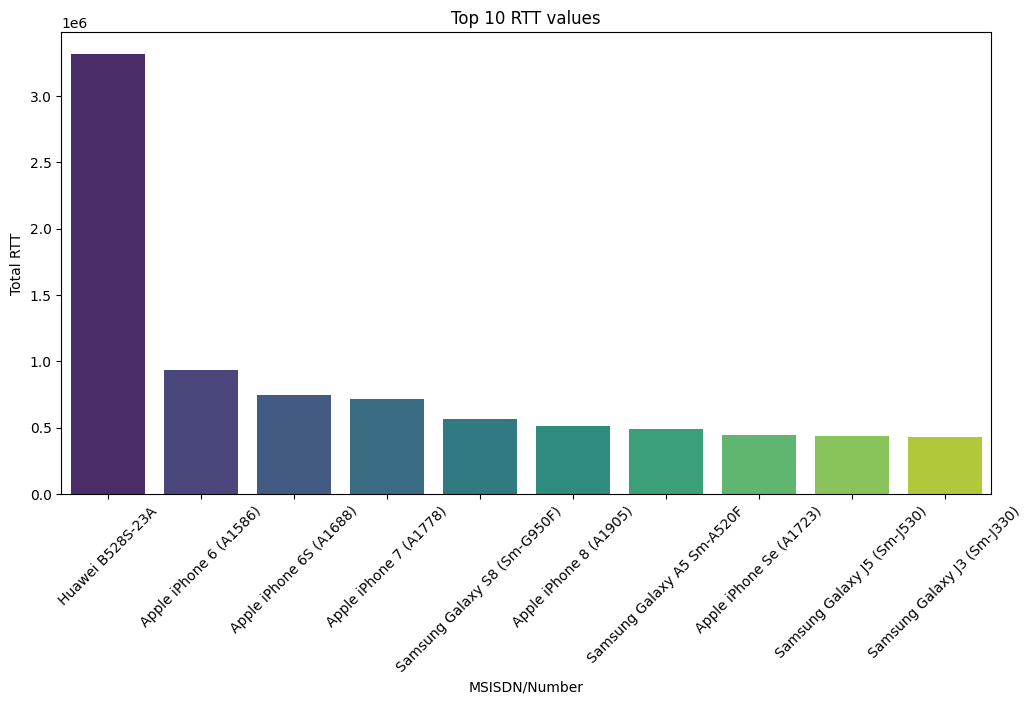

c:\Users\user\Downloads\ten_academy\week1\Week1-10Academy-User-Analysis\src\plots.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


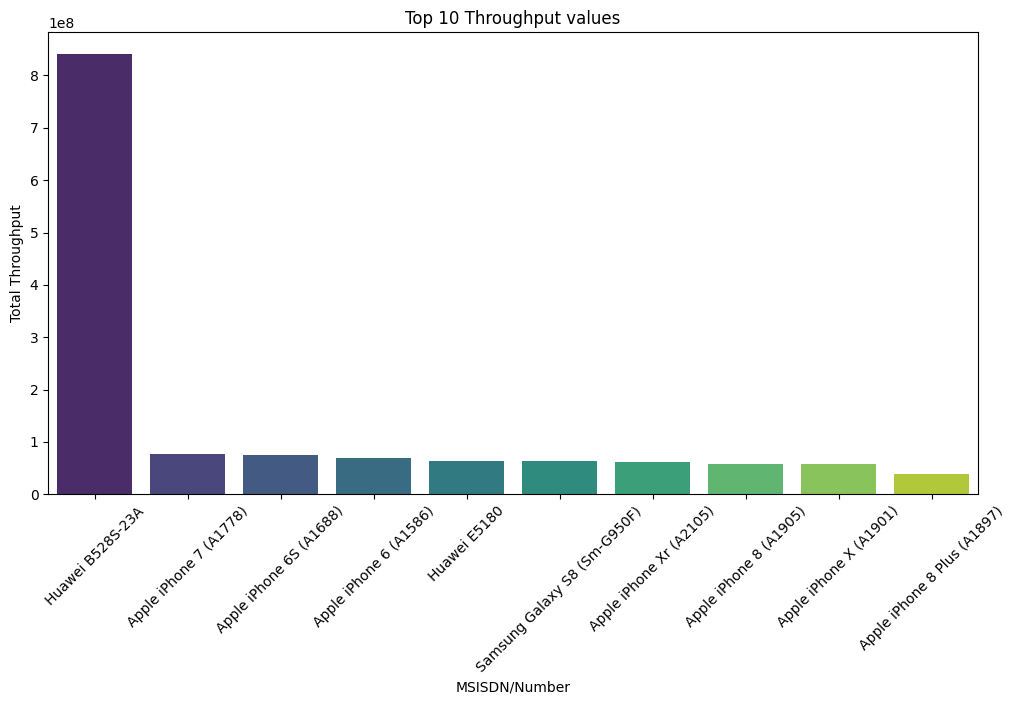

In [16]:

# Task 4.2: Compute and list 10 of the top, bottom, and most frequent values for TCP retransmission, RTT, and throughput

# Define a function to get top, bottom, and most frequent values
def get_top_bottom_frequent(series: pd.DataFrame, n=10) -> pd.DataFrame:
    top_values = series.nlargest(n)  # Top values
    bottom_values = series.nsmallest(n)  # Bottom values
    most_frequent_values = series.value_counts().nlargest(n)  # Most frequent values
    return top_values, bottom_values, most_frequent_values

# Top, bottom, and most frequent TCP retransmission values
tcp_dl = handset_aggregate['average_download_retransmission']
tcp_ul = handset_aggregate['average_upload_retransmission']
tcp_total = tcp_dl + tcp_ul  # Total TCP retransmission
customer_experience_aggregate['total_tcp_retransmission'] = tcp_total

top_tcp, bottom_tcp, most_frequent_tcp = get_top_bottom_frequent(tcp_total)

# Top, bottom, and most 7890-=frequent RTT values
rtt_dl = handset_aggregate['average_download_rtt']
rtt_ul = handset_aggregate['average_upload_rtt']
rtt_total = (rtt_dl + rtt_ul)  # Average RTT
customer_experience_aggregate['total_rtt'] = rtt_total

top_rtt, bottom_rtt, most_frequent_rtt = get_top_bottom_frequent(rtt_total)

# Top, bottom, and most frequent throughput values
throughput_dl = handset_aggregate['average_download_throughput']
throughput_ul = handset_aggregate['average_upload_throughput']
throughput_total = (throughput_dl + throughput_ul) # Average throughput
customer_experience_aggregate['total_throughput'] = throughput_total

top_throughput, bottom_throughput, most_frequent_throughput = get_top_bottom_frequent(throughput_total)

# Create a dictionary with the results for easy output
tcp_results = {
    "Top 10 TCP values": top_tcp,
    "Bottom 10 TCP values": bottom_tcp,
    "Most frequent 10 TCP values": most_frequent_tcp
}

rtt_results = {
    "Top 10 RTT values": top_rtt,
    "Bottom 10 RTT values": bottom_rtt,
    "Most frequent 10 RTT values": most_frequent_rtt
}

throughput_results = {
    "Top 10 Throughput values": top_throughput,
    "Bottom 10 Throughput values": bottom_throughput,
    "Most frequent 10 Throughput values": most_frequent_throughput
}

# tcp_results, rtt_results, throughput_results  # Display the results for each category
plot.plot_bar(top_tcp.index, top_tcp, "MSISDN/Number", "Total TCP Retransmission", "Top 10 TCP values")
plot.plot_bar(top_rtt.index, top_rtt, "MSISDN/Number", "Total RTT", "Top 10 RTT values")
plot.plot_bar(top_throughput.index, top_throughput, "MSISDN/Number", "Total Throughput", "Top 10 Throughput values")
# plot all results in one plot

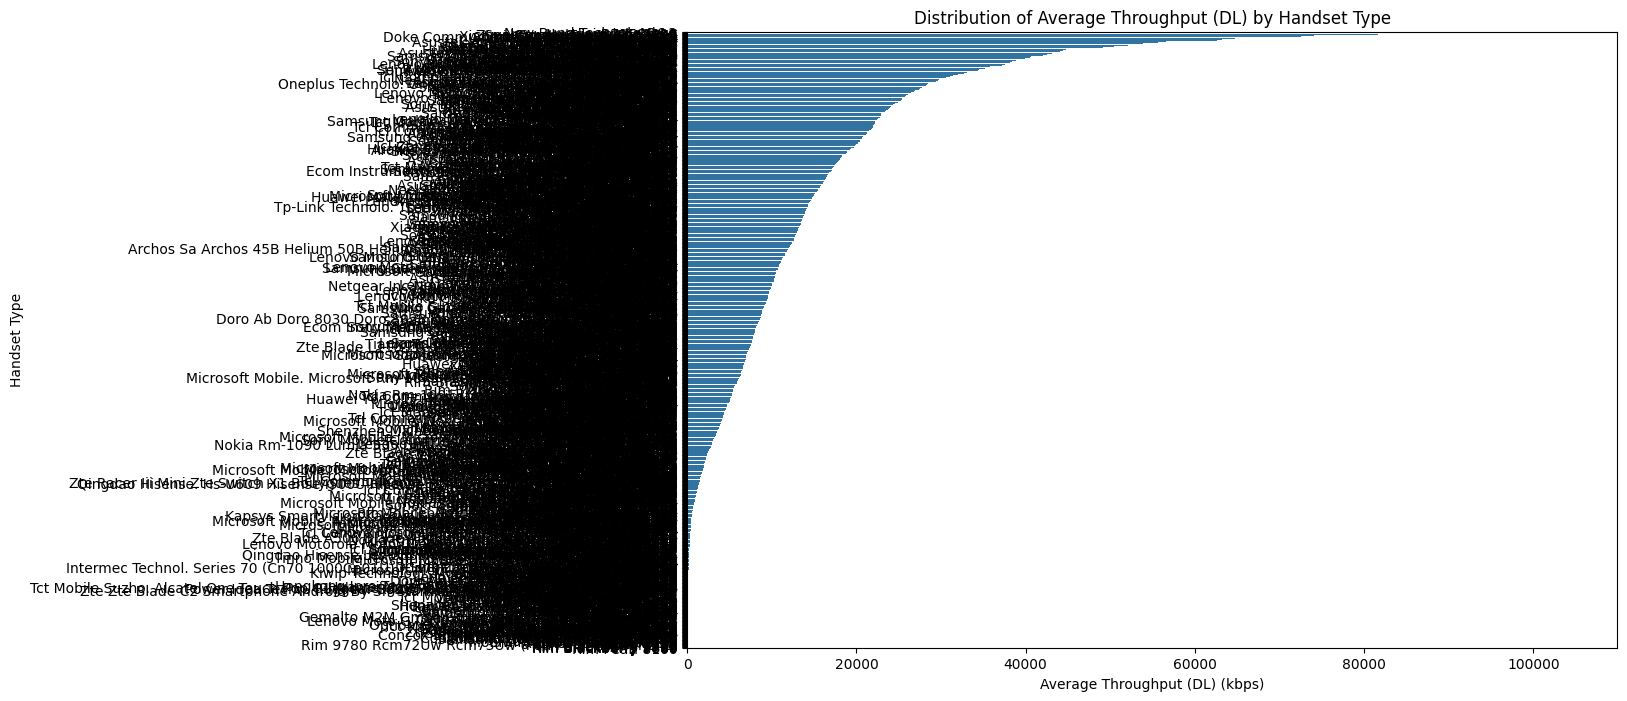

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Handset Type' and calculate the average throughput (download) for each handset type
handset_throughput = df.groupby("Handset Type")["Avg Bearer TP DL (kbps)"].mean().reset_index()

# Plotting the distribution of average throughput by handset type
plt.figure(figsize=(12, 8))
sns.barplot(x="Avg Bearer TP DL (kbps)", y="Handset Type", data=handset_throughput, order=handset_throughput.sort_values("Avg Bearer TP DL (kbps)", ascending=False)["Handset Type"])
plt.title("Distribution of Average Throughput (DL) by Handset Type")
plt.xlabel("Average Throughput (DL) (kbps)")
plt.ylabel("Handset Type")
plt.show()  # Display the plot


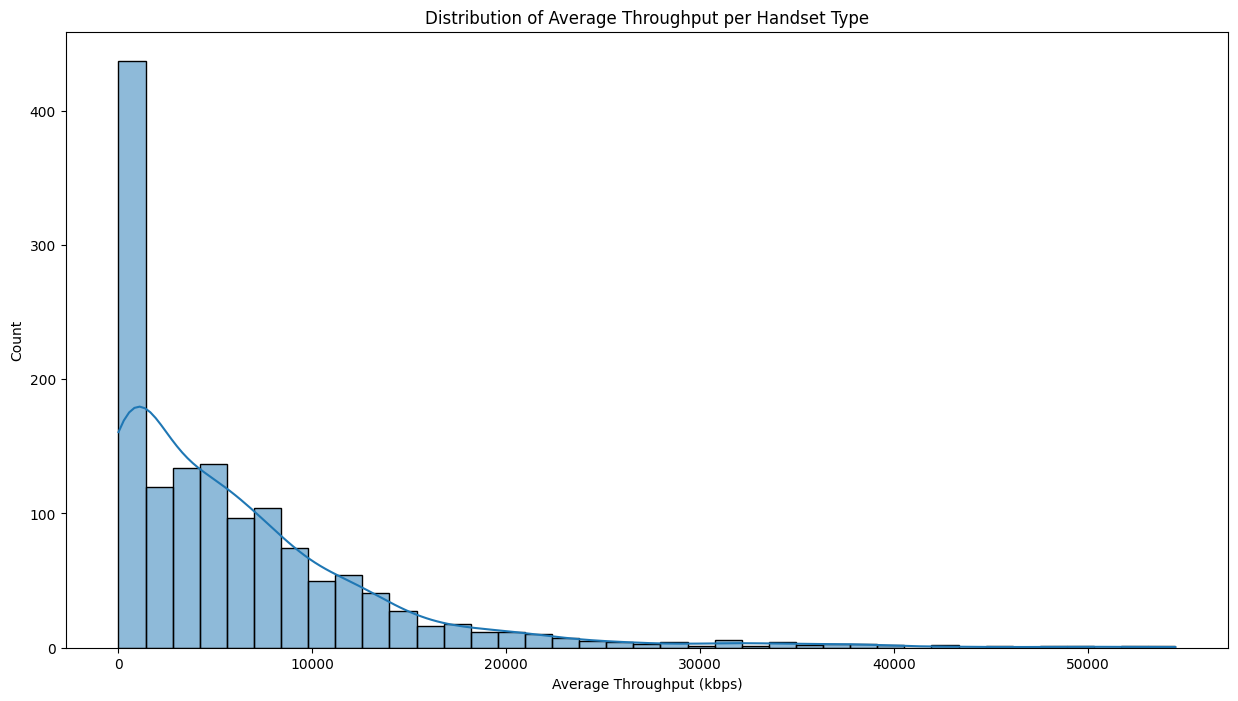

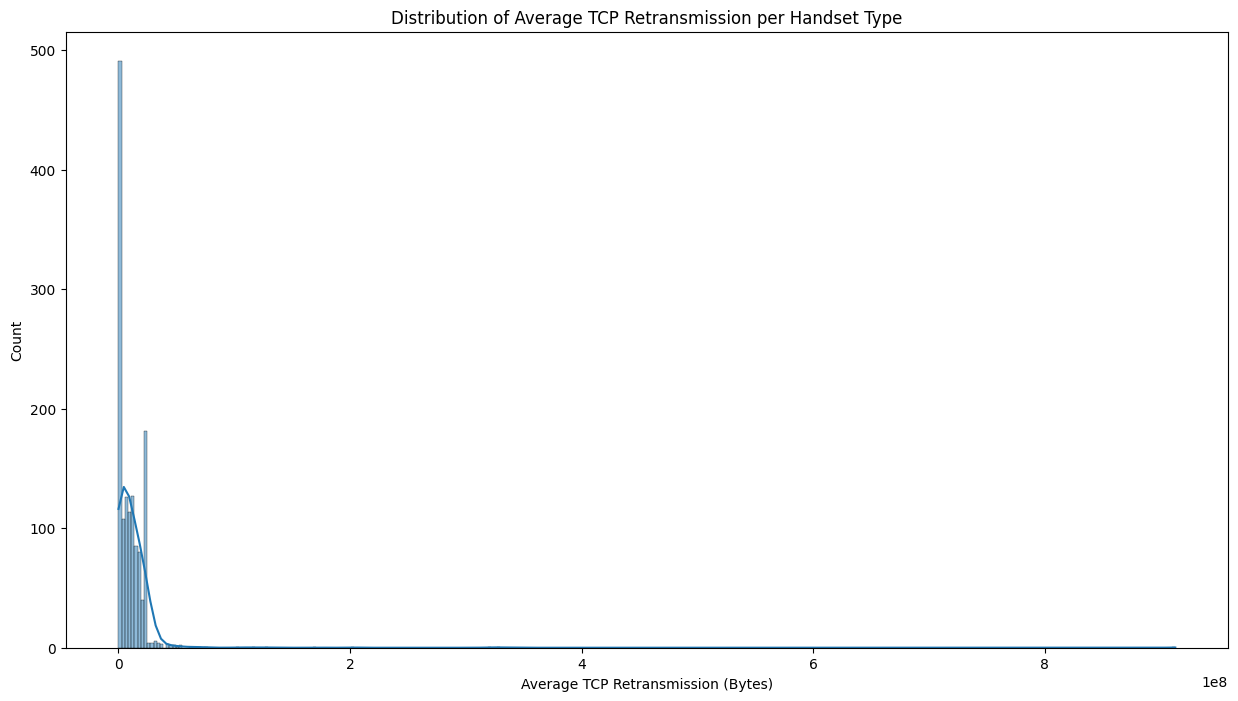

(Handset Type
 A-Link Telecom I. Cubot A5                                                             11755.0
 A-Link Telecom I. Cubot Note Plus                                                       3349.5
 A-Link Telecom I. Cubot Note S                                                          4468.5
 A-Link Telecom I. Cubot Nova                                                           28108.5
 A-Link Telecom I. Cubot Power                                                          34734.0
                                                                                         ...   
 Zte Starxtrem By Sfr                                                                     444.0
 Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.0
 Zyxel Communicat. Lte7460                                                              30978.0
 Zyxel Communicat. Sbg3600                                                              48675.5
 Zyxel Communicat. Zyxel W

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Task 4.3: Distribution of the average throughput per handset type

# Group by handset type and calculate the average throughput
handset_throughput = df.groupby('Handset Type')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)

# Distribution plot of average throughput per handset type
plt.figure(figsize=(15, 8))
sns.histplot(handset_throughput, kde=True)
plt.title("Distribution of Average Throughput per Handset Type")
plt.xlabel("Average Throughput (kbps)")
plt.ylabel("Count")
plt.show()  # Display the plot

# Task 4.3: Average TCP retransmission view per handset type

# Group by handset type and calculate the average TCP retransmission
handset_tcp_retransmission = df.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].sum().sum(axis=1) / df.groupby('Handset Type').size()

# Distribution plot of average TCP retransmission per handset type
plt.figure(figsize=(15, 8))
sns.histplot(handset_tcp_retransmission, kde=True)
plt.title("Distribution of Average TCP Retransmission per Handset Type")
plt.xlabel("Average TCP Retransmission (Bytes)")
plt.ylabel("Count")
plt.show()  # Display the plot

# Return data for further analysis if needed
handset_throughput, handset_tcp_retransmission  # Display the average throughput and TCP retransmission per handset type

In [21]:
handset_throughput

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.0
A-Link Telecom I. Cubot Note Plus                                                       3349.5
A-Link Telecom I. Cubot Note S                                                          4468.5
A-Link Telecom I. Cubot Nova                                                           28108.5
A-Link Telecom I. Cubot Power                                                          34734.0
                                                                                        ...   
Zte Starxtrem By Sfr                                                                     444.0
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.0
Zyxel Communicat. Lte7460                                                              30978.0
Zyxel Communicat. Sbg3600                                                              48675.5
Zyxel Communicat. Zyxel Wah7706      

In [37]:
from scipy import stats

numeric_columns = [
    "average_download_retransmission",
    "average_upload_retransmission",
    "average_upload_rtt",
    "average_download_rtt",
    "average_upload_throughput",
    "average_download_throughput"
]
# Detect and handle outliers in the numeric columns by capping at a certain z-score
z_score_threshold = 3  # Commonly used threshold to detect outliers (z-score > 3)

# Cap the values in each numeric column to handle outliers
for column in numeric_columns:
    z_scores = stats.zscore(customer_experience_aggregate[column])
    customer_experience_aggregate[column] = \
        customer_experience_aggregate[column].where((z_scores < z_score_threshold) & (z_scores > -z_score_threshold), 
        customer_experience_aggregate[column].mean())

# Normalize the features for clustering (using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Apply the scaler to the relevant columns
data_scaled = customer_experience_aggregate.copy()
data_scaled[numeric_columns] = scaler.fit_transform(customer_experience_aggregate[numeric_columns])

data_scaled  # Display the first few rows to confirm normalization and outlier handling


,average_download_retransmission,average_upload_retransmission,average_download_rtt,average_upload_rtt,handset_type,average_upload_throughput,average_download_throughput,total_tcp_retransmission,total_rtt,total_throughput,Cluster
MSISDN/Number,,,,,,,,,,,
3.360100e+10,0.326934,0.305478,0.109264,0.000000,Huawei P20 Lite Huawei Nova 3E,0.004374,0.000447,2.235880e+07,46.000000,76.0,0
3.360100e+10,0.326934,0.305478,0.071259,0.014450,Apple iPhone 7 (A1778),0.005720,0.000580,2.235880e+07,31.000000,99.0,0
3.360101e+10,0.000016,0.305478,0.163895,0.216747,Apple iPhone 5S (A1457),0.004935,0.002465,7.850449e+05,84.000000,248.0,0
3.360101e+10,0.468614,0.313739,0.270784,0.072249,Apple iPhone Se (A1723),0.216198,0.488057,3.172963e+07,119.000000,56844.0,0
3.360101e+10,0.326976,0.610956,0.312196,0.297703,Samsung Galaxy A8 (2018),0.043293,0.090882,2.314554e+07,152.036927,7908.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,0.003259,0.001169,0.099762,0.144498,Huawei Honor 9 Lite,0.043405,0.120555,2.180450e+05,52.000000,10365.0,0
3.379000e+10,0.326934,0.305478,0.080760,0.086699,Apple iPhone 8 Plus (A1897),0.005384,0.000822,2.235880e+07,40.000000,116.0,0
3.197021e+12,0.326934,0.305478,0.262314,0.254354,Quectel Wireless. Quectel Ec25-E,0.000000,0.000012,2.235880e+07,128.036927,1.0,0


In [33]:
customer_experience_aggregate.isna().sum()

average_download_retransmission    0
average_upload_retransmission      0
average_download_rtt               0
average_upload_rtt                 0
handset_type                       0
average_upload_throughput          0
average_download_throughput        0
total_tcp_retransmission           0
total_rtt                          0
total_throughput                   0
Cluster                            0
dtype: int64

In [39]:
from sklearn.cluster import KMeans

# Select the relevant features for clustering
features_for_clustering = [
    "average_download_retransmission",
    "average_upload_retransmission",
    "average_upload_rtt",
    "average_download_rtt",
    "average_upload_throughput",
    "average_download_throughput"
]

# Apply k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Set a random seed for reproducibility
data_scaled["cluster"] = kmeans.fit_predict(data_scaled[features_for_clustering])

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Get the distribution of clusters
cluster_distribution = data_scaled["cluster"].value_counts()

# Return the cluster centroids and distribution
cluster_centroids, cluster_distribution


(array([[0.1494277 , 0.13643232, 0.28964572, 0.25969981, 0.28840321,
         0.43615124],
        [0.27242942, 0.27081384, 0.12676707, 0.17629314, 0.02538182,
         0.0239694 ],
        [0.63518307, 0.6188713 , 0.28555762, 0.34971187, 0.1027827 ,
         0.11431705]]),
 cluster
 1    59904
 0    26222
 2    14061
 Name: count, dtype: int64)

In [42]:
# Descriptive statistics for each cluster to identify unique patterns or behaviors
cluster_descriptive_stats = data_scaled.groupby("cluster")[numeric_columns].describe()

# User distribution by handset type within each cluster
user_distribution_by_handset_type = data_scaled.groupby("cluster")["handset_type"].value_counts(normalize=True, ascending=False)

# Feature comparison across clusters using means to see what differentiates them
feature_comparison_across_clusters = data_scaled.groupby("cluster")[numeric_columns].mean()

# Return the descriptive statistics, user distribution by handset type, and feature comparison across clusters
cluster_descriptive_stats, user_distribution_by_handset_type, feature_comparison_across_clusters


(        average_download_retransmission                                    \
                                   count      mean       std           min   
 cluster                                                                     
 0                               26222.0  0.149753  0.172025  4.394517e-07   
 1                               59904.0  0.272207  0.125336  0.000000e+00   
 2                               14061.0  0.635138  0.178013  3.145868e-05   
 
                                                 average_upload_retransmission  \
               25%       50%       75%       max                         count   
 cluster                                                                         
 0        0.006598  0.054597  0.327218  0.994227                       26222.0   
 1        0.326934  0.326934  0.326934  0.941453                       59904.0   
 2        0.653868  0.653868  0.653967  1.000000                       14061.0   
 
                    ... average_uplo

In [52]:
user_distribution_by_handset_type.head(1000) # print all dataframe values

cluster  handset_type                                               
0        Huawei B528S-23A                                               0.327969
         Apple iPhone 6 (A1586)                                         0.035428
         Huawei E5180                                                   0.034208
         Apple iPhone 7 (A1778)                                         0.033979
         Samsung Galaxy S8 (Sm-G950F)                                   0.033026
                                                                          ...   
1        Apple iPhone 6S (A1700)                                        0.000184
         Apple iPhone 8 (A1906)                                         0.000184
         Apple iPhone Xs (A1920)                                        0.000184
         Doro Ab Doro 8030 Doro 8028 Doro 8031 Doro 8030C Doro 8031C    0.000184
         Lenovo Moto G (5Th Gen) Indr003546                             0.000184
Name: proportion, Length: 1000, dtype: f

### User Distribution by Handset Type
The distribution of handset types within each cluster provides insights into user behavior and device characteristics:

- Cluster 0 has a high proportion of Huawei B528S-23A users (32.7%), suggesting it might represent users with mid-range devices.
- Cluster 1 contains various handset types, with a lower proportion of Huawei B528S-23A users, indicating this cluster may represent a more diverse range of users.
- Cluster 2 shows different handset types, with users of high-throughput devices, indicating this cluster might represent users with higher data usage or advanced network needs.
Feature Comparison Across Clusters

### A comparison of key features across clusters helps understand what differentiates them:

- Cluster 0 has moderate retransmission rates, high throughput, and higher upload RTT. This cluster likely represents users with better network performance.
- Cluster 1 has higher retransmission rates and lower throughput, suggesting users who might face network issues or use lower-end devices.
- Cluster 2 has high throughput, particularly in uploads, indicating it represents users with higher network demands.
Cluster Interpretation

### Based on these analyses, the clusters can be interpreted as follows:

- Cluster 0: Represents users with moderate retransmission rates and high throughput, likely experiencing good network performance.
- Cluster 1: Represents users with high retransmission rates and low throughput, suggesting potential network issues or lower-end devices.
- Cluster 2: Represents users with high throughput, especially in uploads, indicating advanced users or those with higher network demands.

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Task 4.4: K-means clustering with 3 clusters based on experience metrics

# Use the aggregated information from Task 4.1 to perform clustering
# Prepare the data for clustering
features_for_clustering = customer_experience_aggregate[['total_tcp_retransmission', 'total_rtt', 'total_throughput']]

# Standardize the data for clustering
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_for_clustering)

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_standardized)

# Add the cluster labels to the original dataframe
customer_experience_aggregate['Cluster'] = cluster_labels

# Calculate the mean values for each cluster to understand the characteristics
cluster_descriptions = customer_experience_aggregate.groupby('Cluster')[['total_tcp_retransmission', 'total_rtt', 'total_throughput']].mean()

# Return the cluster descriptions and a sample of the clusters with their data
customer_experience_aggregate.head(10)  # Display the cluster characteristics and a sample of customers with their clusters


,average_download_retransmission,average_upload_retransmission,average_download_rtt,average_upload_rtt,handset_type,average_upload_throughput,average_download_throughput,total_tcp_retransmission,total_rtt,total_throughput,Cluster
MSISDN/Number,,,,,,,,,,,
3.360100e+10,2.157482e+07,7.839789e+05,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,39.0,37.0,2.235880e+07,46.000000,76.0,0
3.360100e+10,2.157482e+07,7.839789e+05,30.000000,1.000000,Apple iPhone 7 (A1778),51.0,48.0,2.235880e+07,31.000000,99.0,0
3.360101e+10,1.066000e+03,7.839789e+05,69.000000,15.000000,Apple iPhone 5S (A1457),44.0,204.0,7.850449e+05,84.000000,248.0,0
3.360101e+10,3.092445e+07,8.051809e+05,114.000000,5.000000,Apple iPhone Se (A1723),16449.0,40395.0,3.172963e+07,119.000000,56844.0,0
3.360101e+10,2.157758e+07,1.567958e+06,131.434334,20.602593,Samsung Galaxy A8 (2018),386.0,7522.0,2.314554e+07,152.036927,7908.0,0
3.360101e+10,2.167310e+07,7.959329e+05,39.000000,14.000000,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,1542.0,40971.0,2.246903e+07,53.000000,42513.0,0
3.360101e+10,2.780000e+02,7.839789e+05,49.000000,3.000000,Samsung Galaxy S8 Plus (Sm-G955F),500.0,747.0,7.842569e+05,52.000000,1247.0,0
3.360102e+10,2.157482e+07,1.294000e+03,60.000000,2.000000,Apple iPhone X (A1865),71.0,75.0,2.157612e+07,62.000000,146.0,0
3.360102e+10,1.458800e+07,6.650000e+03,141.000000,19.000000,Apple iPhone 7 Plus (A1784),569.0,18687.0,1.459464e+07,160.000000,19256.0,0


In [32]:
cluster_descriptions

,total_tcp_retransmission,total_rtt,total_throughput
Cluster,,,
0,2.452353e+07,176.488237,2.118795e+04
1,2.923639e+09,380.650835,1.503588e+05
2,1.759655e+10,325574.704416,1.720983e+07
